In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: MA
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


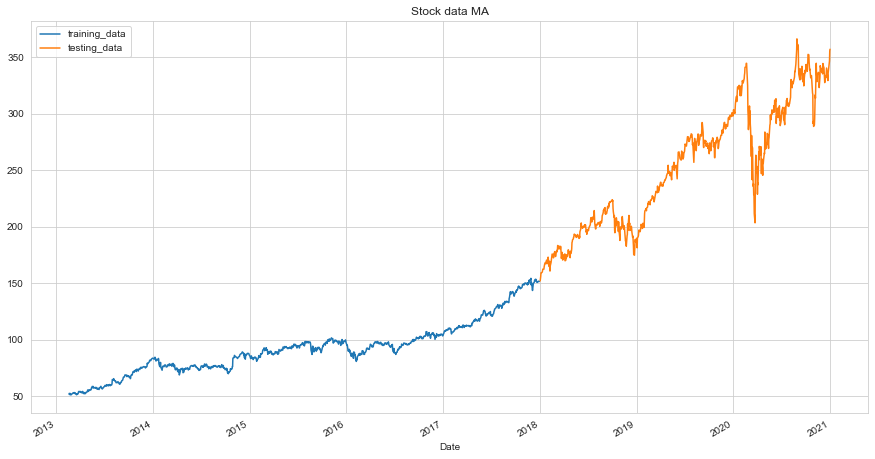

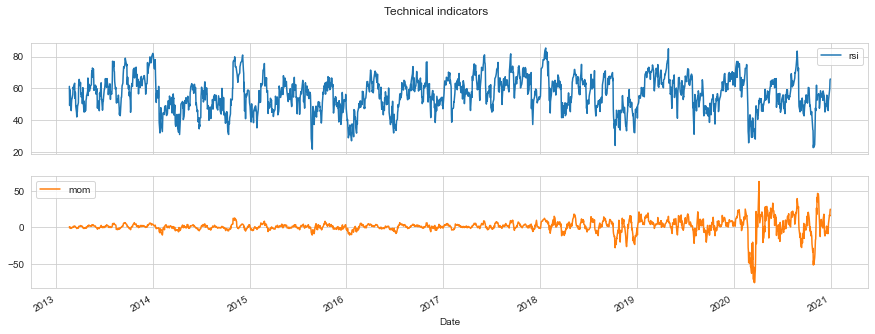

In [2]:
stock_name = 'ma'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1498.96, duration: 0:00:00.305067
episode: 2/2000, episode end value: 1499.08, duration: 0:00:00.370082
episode: 3/2000, episode end value: 1509.35, duration: 0:00:00.382082
episode: 4/2000, episode end value: 1495.28, duration: 0:00:00.364082
episode: 5/2000, episode end value: 1499.52, duration: 0:00:00.321071
episode: 6/2000, episode end value: 1511.38, duration: 0:00:00.349077
episode: 7/2000, episode end value: 1500.19, duration: 0:00:00.308068
episode: 8/2000, episode end value: 1495.52, duration: 0:00:00.303074
episode: 9/2000, episode end value: 1494.55, duration: 0:00:00.259054
episode: 10/2000, episode end value: 1512.07, duration: 0:00:00.280063
episode: 11/2000, episode end value: 1497.91, duration: 0:00:00.281065
episode: 12/2000, episode end value: 1515.30, duration: 0:00:00.276061
episode: 13/2000, episode end value: 1508.82, duration: 0:00:00.286064
episode: 14/2000, episode end value: 1492.55, duration: 0:00:00.274062
episode: 15/200

episode: 117/2000, episode end value: 1518.63, duration: 0:00:00.319069
episode: 118/2000, episode end value: 1492.66, duration: 0:00:00.327074
episode: 119/2000, episode end value: 1519.69, duration: 0:00:00.307074
episode: 120/2000, episode end value: 1525.43, duration: 0:00:00.343572
episode: 121/2000, episode end value: 1512.87, duration: 0:00:00.362038
episode: 122/2000, episode end value: 1503.93, duration: 0:00:00.348079
episode: 123/2000, episode end value: 1543.06, duration: 0:00:00.368078
episode: 124/2000, episode end value: 1524.95, duration: 0:00:00.337080
episode: 125/2000, episode end value: 1514.23, duration: 0:00:00.345079
episode: 126/2000, episode end value: 1513.98, duration: 0:00:00.417094
episode: 127/2000, episode end value: 1509.29, duration: 0:00:00.395089
episode: 128/2000, episode end value: 1514.18, duration: 0:00:00.435098
episode: 129/2000, episode end value: 1521.74, duration: 0:00:00.414095
episode: 130/2000, episode end value: 1537.89, duration: 0:00:00

episode: 231/2000, episode end value: 1493.38, duration: 0:00:00.518116
episode: 232/2000, episode end value: 1496.50, duration: 0:00:00.409091
episode: 233/2000, episode end value: 1493.10, duration: 0:00:00.354082
episode: 234/2000, episode end value: 1495.32, duration: 0:00:00.422092
episode: 235/2000, episode end value: 1494.32, duration: 0:00:00.375087
episode: 236/2000, episode end value: 1494.55, duration: 0:00:00.397088
episode: 237/2000, episode end value: 1491.49, duration: 0:00:00.379086
episode: 238/2000, episode end value: 1494.33, duration: 0:00:00.381084
episode: 239/2000, episode end value: 1497.97, duration: 0:00:00.405091
episode: 240/2000, episode end value: 1501.73, duration: 0:00:00.409093
episode: 241/2000, episode end value: 1499.21, duration: 0:00:00.451102
episode: 242/2000, episode end value: 1495.08, duration: 0:00:00.471108
episode: 243/2000, episode end value: 1491.67, duration: 0:00:00.408095
episode: 244/2000, episode end value: 1494.42, duration: 0:00:00

episode: 345/2000, episode end value: 1494.96, duration: 0:00:00.532116
episode: 346/2000, episode end value: 1499.84, duration: 0:00:00.573129
episode: 347/2000, episode end value: 1490.66, duration: 0:00:00.531115
episode: 348/2000, episode end value: 1506.74, duration: 0:00:00.478110
episode: 349/2000, episode end value: 1502.32, duration: 0:00:00.554128
episode: 350/2000, episode end value: 1529.13, duration: 0:00:00.600134
episode: 351/2000, episode end value: 1558.32, duration: 0:00:00.540122
episode: 352/2000, episode end value: 1613.10, duration: 0:00:00.540123
episode: 353/2000, episode end value: 1611.00, duration: 0:00:00.469108
episode: 354/2000, episode end value: 1534.31, duration: 0:00:00.458104
episode: 355/2000, episode end value: 1541.15, duration: 0:00:00.435097
episode: 356/2000, episode end value: 1520.88, duration: 0:00:00.438097
episode: 357/2000, episode end value: 1543.64, duration: 0:00:00.406094
episode: 358/2000, episode end value: 1549.91, duration: 0:00:00

episode: 459/2000, episode end value: 1546.85, duration: 0:00:00.426097
episode: 460/2000, episode end value: 1605.06, duration: 0:00:00.430098
episode: 461/2000, episode end value: 1563.41, duration: 0:00:00.529120
episode: 462/2000, episode end value: 1495.94, duration: 0:00:00.416098
episode: 463/2000, episode end value: 1532.72, duration: 0:00:00.390084
episode: 464/2000, episode end value: 1504.60, duration: 0:00:00.481108
episode: 465/2000, episode end value: 1508.51, duration: 0:00:00.512959
episode: 466/2000, episode end value: 1504.27, duration: 0:00:00.480688
episode: 467/2000, episode end value: 1525.01, duration: 0:00:00.444100
episode: 468/2000, episode end value: 1509.57, duration: 0:00:00.415091
episode: 469/2000, episode end value: 1493.69, duration: 0:00:00.425096
episode: 470/2000, episode end value: 1509.86, duration: 0:00:00.508364
episode: 471/2000, episode end value: 1509.99, duration: 0:00:00.569486
episode: 472/2000, episode end value: 1510.20, duration: 0:00:00

episode: 573/2000, episode end value: 1561.91, duration: 0:00:00.407090
episode: 574/2000, episode end value: 1573.99, duration: 0:00:00.503114
episode: 575/2000, episode end value: 1548.13, duration: 0:00:00.461106
episode: 576/2000, episode end value: 1577.80, duration: 0:00:00.528119
episode: 577/2000, episode end value: 1513.30, duration: 0:00:00.565130
episode: 578/2000, episode end value: 1560.04, duration: 0:00:00.596132
episode: 579/2000, episode end value: 1540.29, duration: 0:00:00.515118
episode: 580/2000, episode end value: 1546.43, duration: 0:00:00.530118
episode: 581/2000, episode end value: 1515.45, duration: 0:00:00.582129
episode: 582/2000, episode end value: 1503.85, duration: 0:00:00.598134
episode: 583/2000, episode end value: 1504.47, duration: 0:00:00.564130
episode: 584/2000, episode end value: 1499.77, duration: 0:00:00.656151
episode: 585/2000, episode end value: 1513.30, duration: 0:00:00.541127
episode: 586/2000, episode end value: 1509.30, duration: 0:00:00

episode: 687/2000, episode end value: 1506.62, duration: 0:00:00.547130
episode: 688/2000, episode end value: 1507.95, duration: 0:00:00.579132
episode: 689/2000, episode end value: 1507.01, duration: 0:00:00.555122
episode: 690/2000, episode end value: 1572.17, duration: 0:00:00.464105
episode: 691/2000, episode end value: 1514.46, duration: 0:00:00.506119
episode: 692/2000, episode end value: 1598.07, duration: 0:00:00.537688
episode: 693/2000, episode end value: 1533.83, duration: 0:00:00.441097
episode: 694/2000, episode end value: 1517.31, duration: 0:00:00.443100
episode: 695/2000, episode end value: 1546.61, duration: 0:00:00.386088
episode: 696/2000, episode end value: 1506.90, duration: 0:00:00.554745
episode: 697/2000, episode end value: 1509.87, duration: 0:00:00.523123
episode: 698/2000, episode end value: 1512.13, duration: 0:00:00.460101
episode: 699/2000, episode end value: 1510.28, duration: 0:00:00.523737
episode: 700/2000, episode end value: 1503.75, duration: 0:00:00

episode: 801/2000, episode end value: 1519.64, duration: 0:00:00.406094
episode: 802/2000, episode end value: 1526.33, duration: 0:00:00.400092
episode: 803/2000, episode end value: 1546.98, duration: 0:00:00.494109
episode: 804/2000, episode end value: 1527.88, duration: 0:00:00.459102
episode: 805/2000, episode end value: 1542.76, duration: 0:00:00.481108
episode: 806/2000, episode end value: 1571.10, duration: 0:00:00.505114
episode: 807/2000, episode end value: 1610.61, duration: 0:00:00.484109
episode: 808/2000, episode end value: 1620.17, duration: 0:00:00.430097
episode: 809/2000, episode end value: 1569.97, duration: 0:00:00.436099
episode: 810/2000, episode end value: 1556.88, duration: 0:00:00.426098
episode: 811/2000, episode end value: 1546.60, duration: 0:00:00.450102
episode: 812/2000, episode end value: 1568.14, duration: 0:00:00.422096
episode: 813/2000, episode end value: 1544.66, duration: 0:00:00.475103
episode: 814/2000, episode end value: 1612.29, duration: 0:00:00

episode: 915/2000, episode end value: 1508.74, duration: 0:00:00.612139
episode: 916/2000, episode end value: 1507.25, duration: 0:00:00.576138
episode: 917/2000, episode end value: 1502.47, duration: 0:00:00.557127
episode: 918/2000, episode end value: 1507.46, duration: 0:00:00.601131
episode: 919/2000, episode end value: 1507.52, duration: 0:00:00.559127
episode: 920/2000, episode end value: 1497.00, duration: 0:00:00.497112
episode: 921/2000, episode end value: 1570.67, duration: 0:00:00.442101
episode: 922/2000, episode end value: 1711.33, duration: 0:00:00.400096
episode: 923/2000, episode end value: 1506.64, duration: 0:00:00.429091
episode: 924/2000, episode end value: 1565.73, duration: 0:00:00.500114
episode: 925/2000, episode end value: 1503.86, duration: 0:00:00.530118
episode: 926/2000, episode end value: 1591.81, duration: 0:00:00.446100
episode: 927/2000, episode end value: 1501.89, duration: 0:00:00.511120
episode: 928/2000, episode end value: 1553.22, duration: 0:00:00

episode: 1029/2000, episode end value: 1505.33, duration: 0:00:00.584704
episode: 1030/2000, episode end value: 1502.81, duration: 0:00:00.525961
episode: 1031/2000, episode end value: 1501.56, duration: 0:00:00.511114
episode: 1032/2000, episode end value: 1502.53, duration: 0:00:00.435104
episode: 1033/2000, episode end value: 1513.46, duration: 0:00:00.574132
episode: 1034/2000, episode end value: 1499.20, duration: 0:00:00.480113
episode: 1035/2000, episode end value: 1507.53, duration: 0:00:00.571126
episode: 1036/2000, episode end value: 1510.30, duration: 0:00:00.596130
episode: 1037/2000, episode end value: 1659.01, duration: 0:00:00.492111
episode: 1038/2000, episode end value: 1495.01, duration: 0:00:00.443189
episode: 1039/2000, episode end value: 1503.37, duration: 0:00:00.533510
episode: 1040/2000, episode end value: 1505.66, duration: 0:00:00.494993
episode: 1041/2000, episode end value: 1509.68, duration: 0:00:00.596401
episode: 1042/2000, episode end value: 1509.88, dur

episode: 1142/2000, episode end value: 1510.70, duration: 0:00:00.516115
episode: 1143/2000, episode end value: 1510.12, duration: 0:00:00.543121
episode: 1144/2000, episode end value: 1510.50, duration: 0:00:00.506114
episode: 1145/2000, episode end value: 1510.30, duration: 0:00:00.527120
episode: 1146/2000, episode end value: 1500.82, duration: 0:00:00.527119
episode: 1147/2000, episode end value: 1509.61, duration: 0:00:00.607137
episode: 1148/2000, episode end value: 1507.96, duration: 0:00:00.606137
episode: 1149/2000, episode end value: 1536.21, duration: 0:00:00.535122
episode: 1150/2000, episode end value: 1540.43, duration: 0:00:00.544118
episode: 1151/2000, episode end value: 1558.50, duration: 0:00:00.501109
episode: 1152/2000, episode end value: 1514.93, duration: 0:00:00.545125
episode: 1153/2000, episode end value: 1578.35, duration: 0:00:00.451100
episode: 1154/2000, episode end value: 1535.47, duration: 0:00:00.470103
episode: 1155/2000, episode end value: 1550.54, dur

episode: 1255/2000, episode end value: 1554.49, duration: 0:00:00.467107
episode: 1256/2000, episode end value: 1508.81, duration: 0:00:00.408096
episode: 1257/2000, episode end value: 1548.63, duration: 0:00:00.483109
episode: 1258/2000, episode end value: 1553.91, duration: 0:00:00.469103
episode: 1259/2000, episode end value: 1510.34, duration: 0:00:00.542126
episode: 1260/2000, episode end value: 1535.29, duration: 0:00:00.468110
episode: 1261/2000, episode end value: 1558.37, duration: 0:00:00.434100
episode: 1262/2000, episode end value: 1537.46, duration: 0:00:00.555129
episode: 1263/2000, episode end value: 1505.50, duration: 0:00:00.531120
episode: 1264/2000, episode end value: 1552.38, duration: 0:00:00.556127
episode: 1265/2000, episode end value: 1508.53, duration: 0:00:00.505115
episode: 1266/2000, episode end value: 1511.33, duration: 0:00:00.542124
episode: 1267/2000, episode end value: 1503.65, duration: 0:00:00.527119
episode: 1268/2000, episode end value: 1541.66, dur

episode: 1368/2000, episode end value: 1534.80, duration: 0:00:00.471102
episode: 1369/2000, episode end value: 1534.27, duration: 0:00:00.590135
episode: 1370/2000, episode end value: 1505.24, duration: 0:00:00.626139
episode: 1371/2000, episode end value: 1570.58, duration: 0:00:00.572129
episode: 1372/2000, episode end value: 1523.21, duration: 0:00:00.481107
episode: 1373/2000, episode end value: 1523.86, duration: 0:00:00.577133
episode: 1374/2000, episode end value: 1525.81, duration: 0:00:00.587136
episode: 1375/2000, episode end value: 1541.29, duration: 0:00:00.554123
episode: 1376/2000, episode end value: 1500.88, duration: 0:00:00.552125
episode: 1377/2000, episode end value: 1596.58, duration: 0:00:00.571126
episode: 1378/2000, episode end value: 1550.81, duration: 0:00:00.495108
episode: 1379/2000, episode end value: 1579.79, duration: 0:00:00.493115
episode: 1380/2000, episode end value: 1537.43, duration: 0:00:00.474104
episode: 1381/2000, episode end value: 1551.54, dur

episode: 1481/2000, episode end value: 1515.22, duration: 0:00:00.444105
episode: 1482/2000, episode end value: 1530.39, duration: 0:00:00.466101
episode: 1483/2000, episode end value: 1631.91, duration: 0:00:00.412093
episode: 1484/2000, episode end value: 1505.02, duration: 0:00:00.464102
episode: 1485/2000, episode end value: 1594.69, duration: 0:00:00.409094
episode: 1486/2000, episode end value: 1578.36, duration: 0:00:00.471106
episode: 1487/2000, episode end value: 1551.28, duration: 0:00:00.400090
episode: 1488/2000, episode end value: 1579.59, duration: 0:00:00.466106
episode: 1489/2000, episode end value: 1594.65, duration: 0:00:00.485107
episode: 1490/2000, episode end value: 1545.65, duration: 0:00:00.498110
episode: 1491/2000, episode end value: 1603.94, duration: 0:00:00.423098
episode: 1492/2000, episode end value: 1614.72, duration: 0:00:00.435099
episode: 1493/2000, episode end value: 1523.28, duration: 0:00:00.364085
episode: 1494/2000, episode end value: 1501.47, dur

episode: 1594/2000, episode end value: 1614.85, duration: 0:00:00.410093
episode: 1595/2000, episode end value: 1542.52, duration: 0:00:00.396088
episode: 1596/2000, episode end value: 1556.02, duration: 0:00:00.384086
episode: 1597/2000, episode end value: 1608.27, duration: 0:00:00.370083
episode: 1598/2000, episode end value: 1536.11, duration: 0:00:00.354084
episode: 1599/2000, episode end value: 1529.55, duration: 0:00:00.441096
episode: 1600/2000, episode end value: 1577.33, duration: 0:00:00.406090
episode: 1601/2000, episode end value: 1613.15, duration: 0:00:00.387086
episode: 1602/2000, episode end value: 1534.41, duration: 0:00:00.400093
episode: 1603/2000, episode end value: 1603.62, duration: 0:00:00.441096
episode: 1604/2000, episode end value: 1604.67, duration: 0:00:00.430097
episode: 1605/2000, episode end value: 1534.87, duration: 0:00:00.488110
episode: 1606/2000, episode end value: 1497.17, duration: 0:00:00.385089
episode: 1607/2000, episode end value: 1500.69, dur

episode: 1707/2000, episode end value: 1497.90, duration: 0:00:00.448102
episode: 1708/2000, episode end value: 1505.97, duration: 0:00:00.407093
episode: 1709/2000, episode end value: 1556.09, duration: 0:00:00.318072
episode: 1710/2000, episode end value: 1565.52, duration: 0:00:00.409091
episode: 1711/2000, episode end value: 1518.88, duration: 0:00:00.337073
episode: 1712/2000, episode end value: 1538.28, duration: 0:00:00.400096
episode: 1713/2000, episode end value: 1515.88, duration: 0:00:00.381083
episode: 1714/2000, episode end value: 1513.67, duration: 0:00:00.397088
episode: 1715/2000, episode end value: 1502.15, duration: 0:00:00.349080
episode: 1716/2000, episode end value: 1501.19, duration: 0:00:00.392090
episode: 1717/2000, episode end value: 1509.67, duration: 0:00:00.406094
episode: 1718/2000, episode end value: 1510.03, duration: 0:00:00.394088
episode: 1719/2000, episode end value: 1541.77, duration: 0:00:00.392086
episode: 1720/2000, episode end value: 1547.99, dur

episode: 1820/2000, episode end value: 1505.15, duration: 0:00:00.406093
episode: 1821/2000, episode end value: 1509.86, duration: 0:00:00.424095
episode: 1822/2000, episode end value: 1510.71, duration: 0:00:00.419092
episode: 1823/2000, episode end value: 1510.30, duration: 0:00:00.417095
episode: 1824/2000, episode end value: 1541.33, duration: 0:00:00.364083
episode: 1825/2000, episode end value: 1550.63, duration: 0:00:00.313657
episode: 1826/2000, episode end value: 1525.71, duration: 0:00:00.357130
episode: 1827/2000, episode end value: 1571.60, duration: 0:00:00.368089
episode: 1828/2000, episode end value: 1543.30, duration: 0:00:00.357081
episode: 1829/2000, episode end value: 1523.46, duration: 0:00:00.327077
episode: 1830/2000, episode end value: 1509.09, duration: 0:00:00.310611
episode: 1831/2000, episode end value: 1537.81, duration: 0:00:00.300127
episode: 1832/2000, episode end value: 1508.80, duration: 0:00:00.342076
episode: 1833/2000, episode end value: 1510.06, dur

episode: 1933/2000, episode end value: 1509.99, duration: 0:00:00.315344
episode: 1934/2000, episode end value: 1541.62, duration: 0:00:00.292064
episode: 1935/2000, episode end value: 1532.89, duration: 0:00:00.254061
episode: 1936/2000, episode end value: 1528.20, duration: 0:00:00.246054
episode: 1937/2000, episode end value: 1533.61, duration: 0:00:00.271069
episode: 1938/2000, episode end value: 1565.59, duration: 0:00:00.269043
episode: 1939/2000, episode end value: 1502.77, duration: 0:00:00.272061
episode: 1940/2000, episode end value: 1501.34, duration: 0:00:00.250074
episode: 1941/2000, episode end value: 1535.55, duration: 0:00:00.262042
episode: 1942/2000, episode end value: 1690.61, duration: 0:00:00.191063
episode: 1943/2000, episode end value: 1566.91, duration: 0:00:00.222041
episode: 1944/2000, episode end value: 1506.85, duration: 0:00:00.260060
episode: 1945/2000, episode end value: 1512.01, duration: 0:00:00.255057
episode: 1946/2000, episode end value: 1521.64, dur

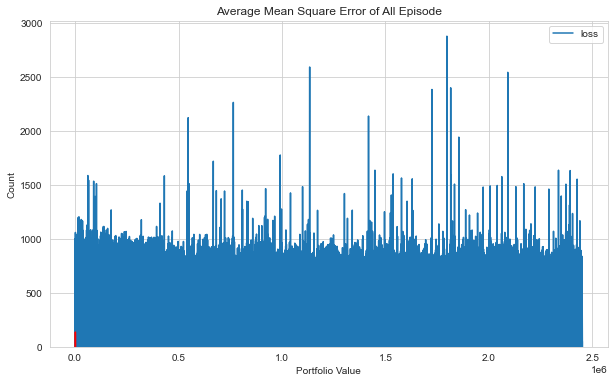

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

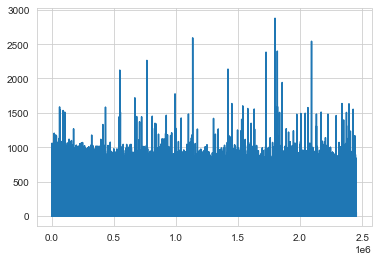

In [5]:
plt.plot(agent.model.losses)

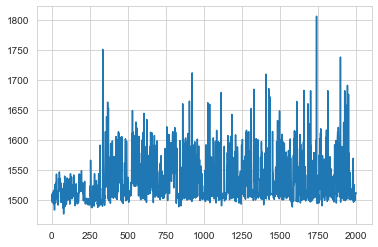

In [6]:
plt.plot(portfolio_value)

episode end value: 1643.36, duration: 0:00:00.057011
Sell: 0 times, Buy: 1 times


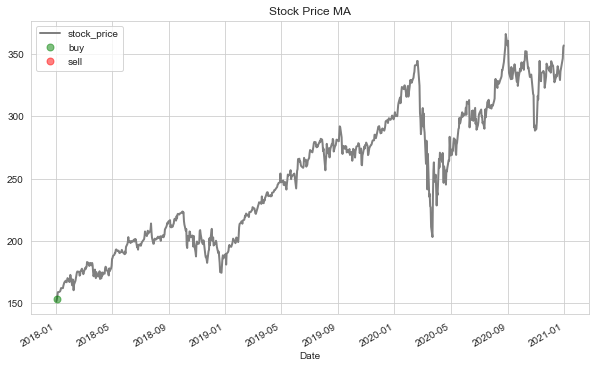

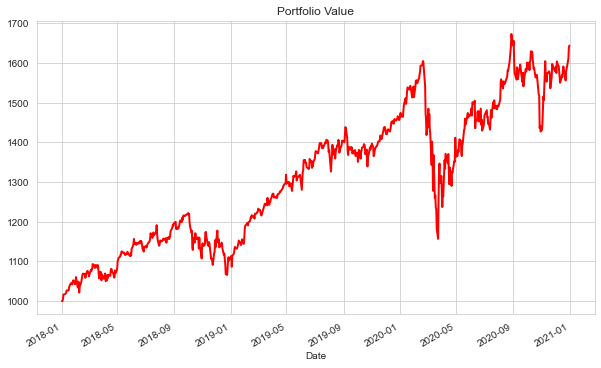

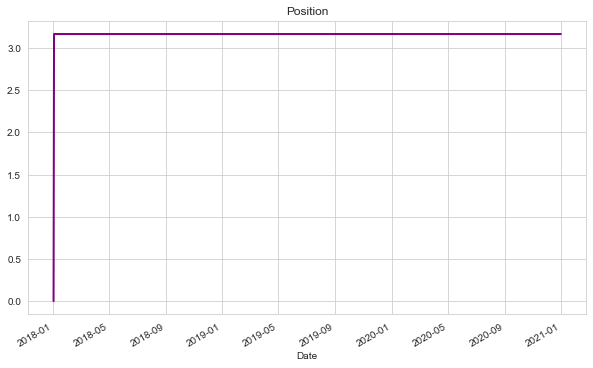

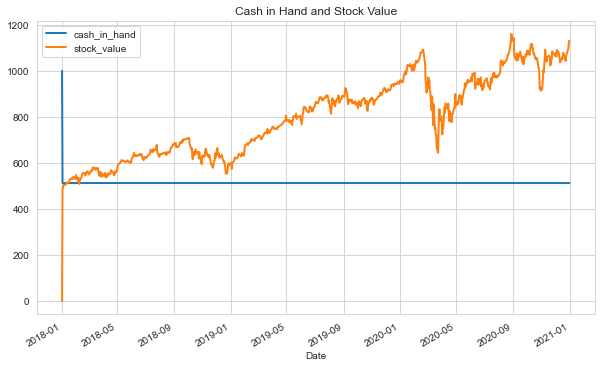

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: MA
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 18.01 %
Volatility: 0.2113
shape ratio: 0.8002
Maximun drawdown: -27.89 %
Calmar ratio: 0.6456
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 32.94 %
Volatility (benchmark): 0.3491
shape ratio: 0.9121
Maximun drawdown: -41.00 %
Calmar ratio (benchmark): 0.8036


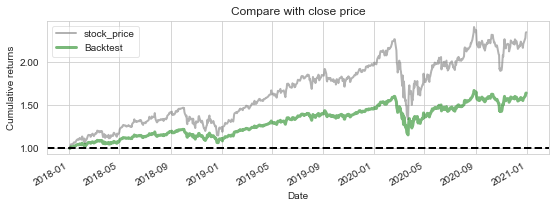

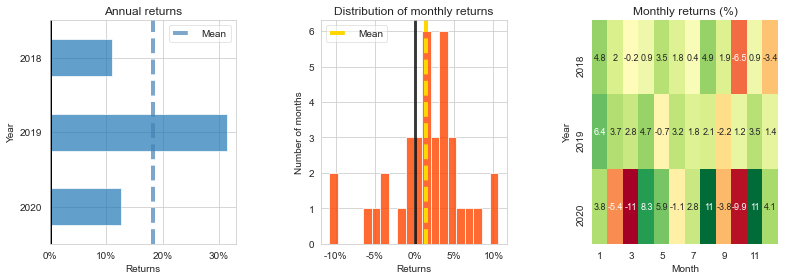

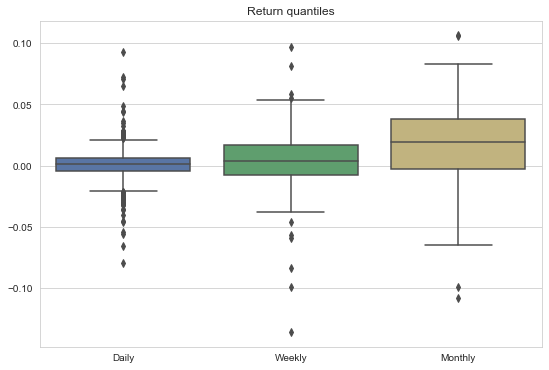

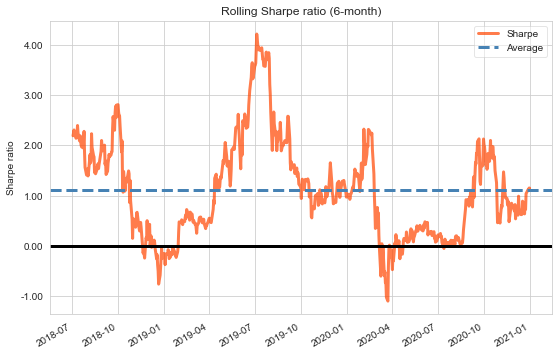

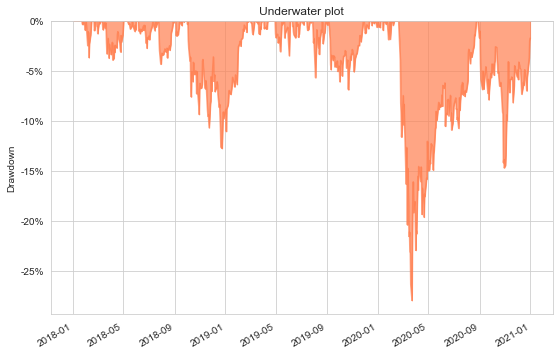

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')